# 3)- Tableau du jeu de données

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Voici les caractéristiques du jeu de données et la  description de chaque attribut / caractéristique ainsi, indique si les variables sont continues, catégoriques ou binaires..</span>

|Feature          | Description                                                           | Example                            |
|:----------------|:----------------------------------------------------------------------|:-----------------------------------|
|Id               | *ID Unique                                                            | de 1  … 5000 (taille du dataset)   |
|Age              | *Age du client                                                        |                                    |
|Job              | *Job du client                                                        | "admin.", "blue-collar", etc.      |
|Marital          | *Status matrimonial du client                                         | "divorced", "married", "single"    |
|Education        | *Niveau d'éducation du client                                         | "primary", "secondary", etc.       |
|Default          | *Le client a un credit par default?                                   | "yes" - 1,"no" - 0                 |
|Balance          | *Solde annuel moyen, en USD                                           |                                    |
|HHInsurance      | *Le ménage est-il assuré?                                             | "yes" - 1,"no" - 0                 |
|CarLoan          | *Le client a-t-il un prêt auto ?                                      | "yes" - 1,"no" - 0                 | 
|Communication    | *Type de communication de contact                                     | "cellular", "telephone", “NA”      |
|LastContactMonth | *Le mois du dernier contact                                           | "jan", "feb", etc.                 |
|LastContactDay   | *Le jour du dernier contact                                           |                                    |
|CallStart        | *Heure de début du dernier appel (HH:MM:SS)                           | 12:43:15                           |
|CallEnd          | *Heure de fin du dernier appel (HH:MM:SS)                             | 12:43:15                           |
|NoOfContacts     | *Nombre de contacts effectués lors de cette campagne pour ce client   |                                    |
|DaysPassed       | *Nombre de jours écoulés après le dernier contact du client d'une     |                                    |
|                 | campagne précédente (numérique; -1 signifie que le client n'a pas     |                                    |
|                 |   encore été contacté).                                               |                                    | 
|PrevAttempts     | *Nombre de contacts établis avant cette campagne et pour ce client    |                                    |
|Outcome          | *résultat de la campagne marketing précédente                         | "failure", "other", "success", “NA”|
|CarInsurance     | *Le client a-t-il souscrit une Assurance Auto?                        | "yes" - 1,"no" - 0                 |

# 4)- Exploration des données

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn import tree

- Choisir l'ID de l'appel comme index des données à importer

In [18]:
# Lecture des données
path='./data/'
df = pd.read_csv(path+'carInsurance_train.csv', encoding='utf8', sep=',')
df.set_index('Id')

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0
6,32,technician,single,tertiary,0,1625,0,0,cellular,22,may,1,109,1,failure,14:58:08,15:11:24,1
7,37,admin.,single,tertiary,0,1000,1,0,cellular,17,mar,1,-1,0,NaN,13:00:02,13:03:17,1
8,35,management,divorced,tertiary,0,538,1,0,NaN,12,may,4,-1,0,NaN,15:39:43,15:40:49,0
9,30,admin.,married,secondary,0,187,1,0,cellular,18,nov,1,-1,0,NaN,12:20:56,12:22:42,0


In [19]:
df.shape

(4000, 19)

- Séries Numériques

In [20]:
# les  colonnes
df.columns

Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')

En remarquant que queklques colonnes Numériques, ont des valeurs binaires ayant 0 'et 1'

- Séries Catégoriques

In [21]:
df.select_dtypes(include=['object']).head()

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
0,management,single,tertiary,telephone,jan,NaN,13:45:20,13:46:30
1,blue-collar,married,primary,NaN,may,NaN,14:49:03,14:52:08
2,management,single,tertiary,cellular,jun,failure,16:30:24,16:36:04
3,student,single,primary,cellular,may,NaN,12:06:43,12:20:22
4,management,married,tertiary,cellular,jun,NaN,14:35:44,14:38:56


In [22]:
df.select_dtypes(include=['int64','float64']).head()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
0,1,32,0,1218,1,0,28,2,-1,0,0
1,2,32,0,1156,1,0,26,5,-1,0,0
2,3,29,0,637,1,0,3,1,119,1,1
3,4,25,0,373,1,0,11,2,-1,0,1
4,5,30,0,2694,0,0,3,1,-1,0,0


# III) PRETRAITEMENT DES DONNÉES

# Matrice de Corrélation:

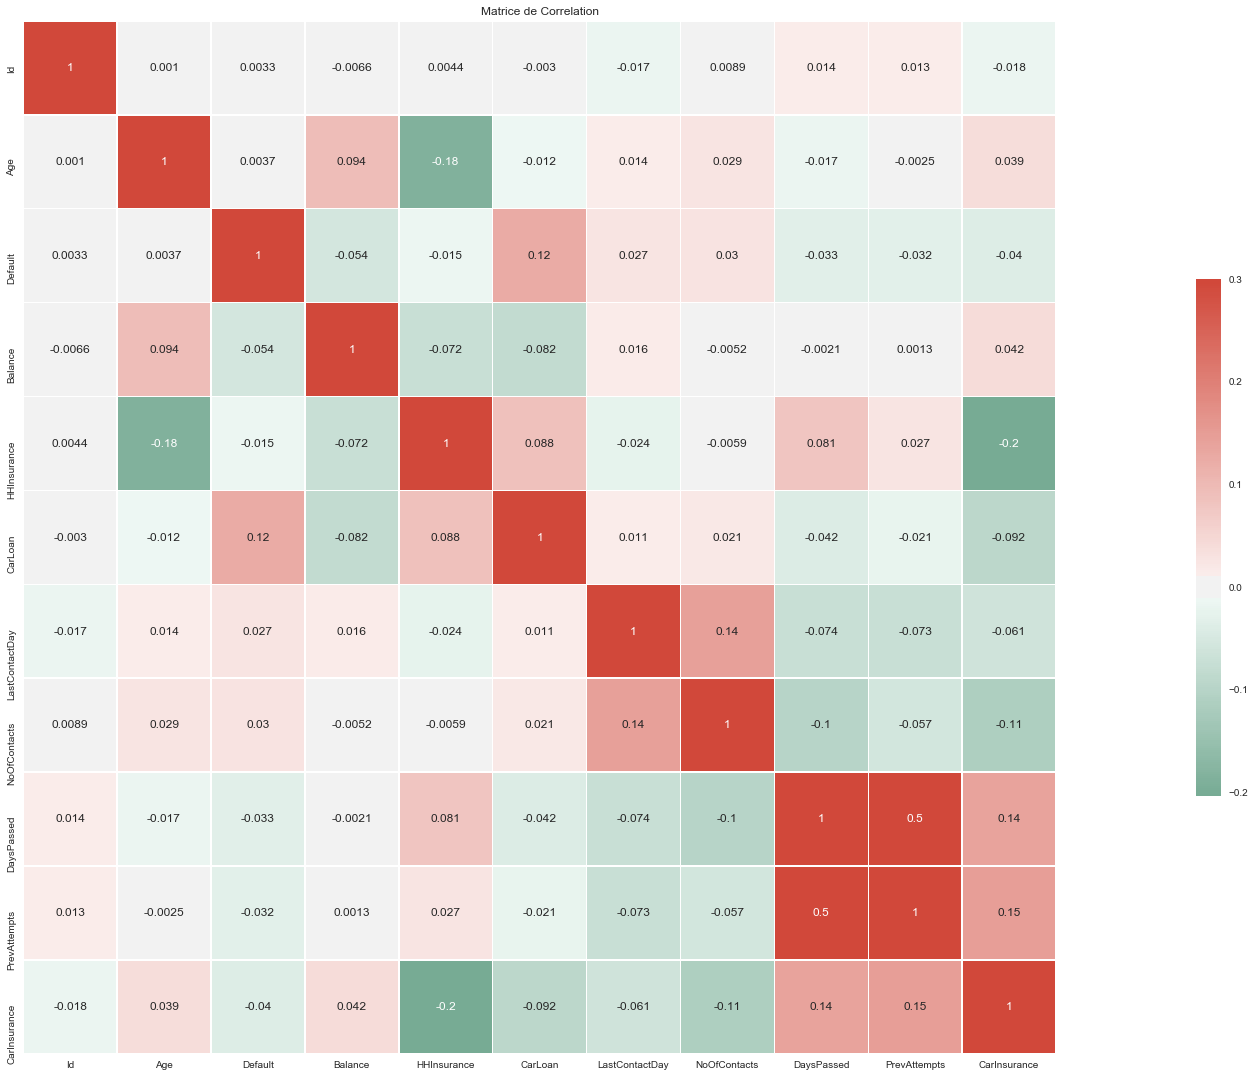

In [26]:
# Matrice de Corrélation OHE:
sns.set(style="white")
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = False
f, ax = plt.subplots(figsize=(50, 19))
cmap = sns.diverging_palette(150, 15, as_cmap=True)
sns.heatmap(corr,annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
plt.title('Matrice de Correlation')
plt.savefig("Matrice_Correlation.png")
plt.show()

#### RÉSULTATS APRES VISUALISATION DE DONNÉES
<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">
La visualisation est un aspect important de Data Science sans lequel il est assez difficile de parvenir à un résultat. Même si le résultat est déterminé par des tableaux, l'analyse de chaque valeur et sa conclusion sont pénibles. Les graphiques / graphiques sont très utiles pour accomplir ces tâches facilement, même à une personne non technique. Les cadres et les gestionnaires aiment regarder un rapport avec la visualisation afin de pouvoir facilement prendre des décisions complexes.Bowow est une représentation en paire qui couple les champs d’intérêt et les trace. Les variables de la représentation en paire sont sélectionnées dans la carte thermique, ce qui a une incidence sur les résultats.

**Points à retenir depuis la matrice de corrélation:**

* Les personnes âgées sont plus susceptibles de souscrire une assurance auto.
* Les personnes ayant déjà souscrit une assurance automobile ou une assurance habitation sont moins susceptibles d’acheter.
* Les gens donnent un signe positif si les jours passent (le temps avant qu'ils aient été contactés) augmente.
* Lorsque vous contactez fréquemment des personnes, leur tendance d'achat augmente après 20 contacts ou plus.
* Le nombre de contacts et de tentatives précédentes fonctionne de la même manière, plus il est avantageux d’augmenter l’achat d’assurance automobile.
 </span>

#  importants Features 

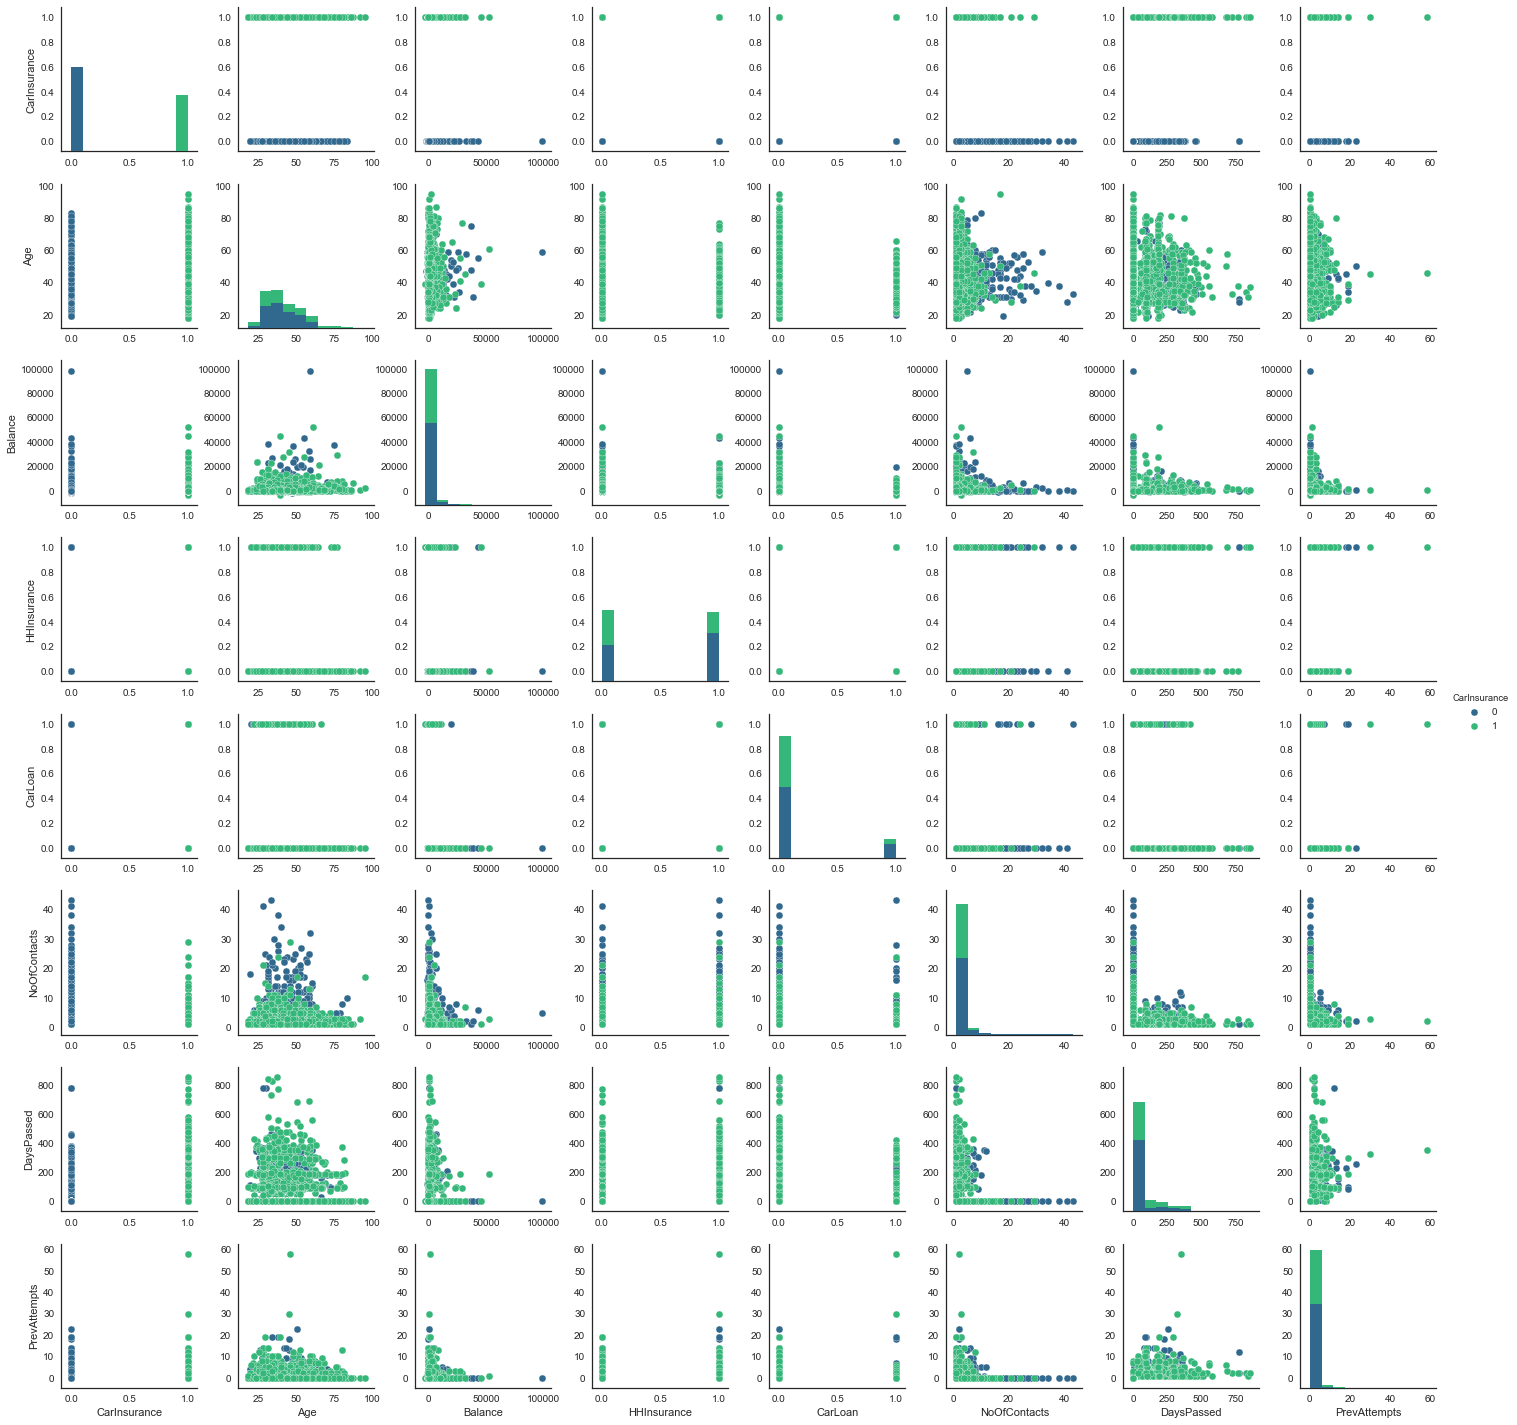

In [27]:
imp_feats = ['CarInsurance','Age','Balance','HHInsurance', 'CarLoan','NoOfContacts','DaysPassed','PrevAttempts']
sns.pairplot(df[imp_feats],hue='CarInsurance',palette='viridis',size=2.5)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



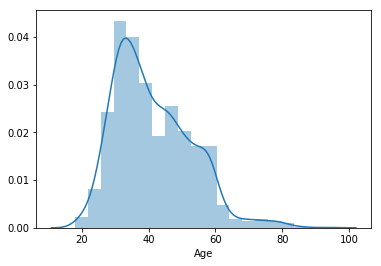

In [11]:
sns.distplot(df["Age"],bins=20)

Cette visualisation nous aide à visualiser les relations entre les variables CarInsurance, Balance et Categoriques telles que l’éducation, l’état matrimonial et l’emploi.
<br><b>Âge:</b> Il est intéressant de voir que les personnes âgées sont plus susceptibles de souscrire une assurance auto.
<br><b>Balance:</b> pour le solde, le point de données dans le coin supérieur droit peut être une valeur aberrante
<br><b>HHInsurance:</b> les ménages assurés sont moins susceptibles de souscrire une assurance auto
<br><b>CarLoan:</b> les personnes avec un prêt auto ont moins tendance à acheter
<br><b>NoOfContacts:</b> trop de contacts sont à l'origine de l'attrition de la clientèle
<br><b>DaysPassed:</b> Il semble que plus le jour s'est écoulé depuis le dernier contact, mieux c'est.
<br><b>PrevAttempts:</b> En outre, plus de tentatives précédentes, moins susceptibles d'acheter. Il y a une valeur aberrante ici


Les attributs sont assez indépendantes, à l'exception de DaysPassed et PreAttempts. Le succès des appels à froid est en corrélation positive avec PreAttemps, DaysPassed, Age et Balance,  et en corrélation négative avec défaut, HHInsurance, CarLoan, LastContactDay et NoOfContacts.

Il semble que les jeunes (<= 30 ans) et les personnes âgées sont plus susceptibles de souscrire une assurance auto auprès de cette banque.

<br><b>Job:</b> les étudiants sont les plus susceptibles de souscrire une assurance, suivis par les retraités et les chômeurs. Ceci correspond à la répartition par âge. Il pourrait y avoir une promotion ciblant les étudiants.
<br><b>Marital:</b> les personnes mariées sont moins susceptibles de souscrire une assurance auto. Possibilités de développement des activités d’assurance familiale
<br><b>Education:</b> les personnes ayant une éducation supérieure sont plus susceptibles d'acheter
<br><b>Communication:</b> Pas de grande différence entre cellulaire et téléphone
<br><b>Outcome de la campagne précédente:</b> le succès de la campagne marketing précédente est largement associé au succès de cette campagne
<br><b>ContactMonth:</b> mars, septembre, octobre et décembre sont les mois les plus chauds. Cela pourrait être associé à la saison scolaire.

# <br><b> ************** Concaténer les deux dataset Train et Test: **********************</b>

In [28]:
train = pd.read_csv(path+'carInsurance_train.csv', encoding='utf8', sep=',')
test = pd.read_csv(path+'carInsurance_test.csv', encoding='utf8', sep=',')
# Split train and test
all=pd.concat([train,test],keys=('train','test'))
all.drop(['CarInsurance','Id'],axis=1,inplace=True)
print(all.shape)
all_df = all.copy()

(5000, 17)


# b) Les Valeurs Manquantes

In [29]:
# valeurs manquantes dans Train
all_df.isnull().sum()

Age                    0
Job                   24
Marital                0
Education            216
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication       1123
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3799
CallStart              0
CallEnd                0
dtype: int64

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">  
Les valeurs manquantes sont une préoccupation majeure dans l’analyse des données.
De plus, les modèles prédictifs ne peuvent être construits sans traiter les valeurs manquantes.</span>



In [30]:
# Valeurs manquantes dans le tout dataset

In [31]:
# Calcul le nombre de données manquantes dans chaque attribut:
total = all_df.isnull().sum()
pct = total/all_df.isnull().count()*100 # pourcentage
NAs = pd.concat([total,pct],axis=1,keys=('Total','Pct %'))
NAs[NAs.Total>0].sort_values(by='Total',ascending=False)

,Total,Pct %
Outcome,3799,75.98
Communication,1123,22.46
Education,216,4.32
Job,24,0.48


<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">  
- Dans notre cas, beaucoup de valeurs manquantes apparaissent principalement dans les champs Outcome et Communication. 
- Job et Education ont aussi une quantité considérable de valeurs manquantes.
</span>

# <br><b> ************** Traitement des valeurs manquantes: **********************</b>

In [32]:
all_df[all_df['DaysPassed']==-1].count()

Age                 3799
Job                 3780
Marital             3799
Education           3645
Default             3799
Balance             3799
HHInsurance         3799
CarLoan             3799
Communication       2683
LastContactDay      3799
LastContactMonth    3799
NoOfContacts        3799
DaysPassed          3799
PrevAttempts        3799
Outcome                0
CallStart           3799
CallEnd             3799
dtype: int64

In [33]:
all_df.mode()['Education'][0]

'secondary'

In [34]:
#all_df = alldf.copy()

# Remplacer les données manquantes de Outcome de la campagne précédente

all_df.loc[all_df['DaysPassed']==-1,'Outcome']='NoPrev'

# Remplacer les données manquantes de "Communication" avec "none" 
all_df['Communication'].value_counts()
all_df['Communication'].fillna('None',inplace=True)

# Remplacer les données manquantes de "Education" avec la valeur la plus populaire avec type de job
all_df['Education'].value_counts()

# mappage job-education 
edu_mode=[]
job_types = all_df.Job.value_counts().index
for job in job_types:
    mode = all_df[all_df.Job==job]['Education'].value_counts().nlargest(1).index
    edu_mode = np.append(edu_mode,mode)
edu_map=pd.Series(edu_mode,index=all_df.Job.value_counts().index)

# mappage de eductaion
for j in job_types:
    all_df.loc[(all_df['Education'].isnull()) & (all_df['Job']==j),'Education'] = edu_map.loc[edu_map.index==j][0]
all_df['Education'].fillna('None',inplace=True)

# remplacer les données manquantes de "Job" avec none
all_df['Job'].fillna('None',inplace=True)

In [35]:
all_df.isnull().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CallStart           0
CallEnd             0
dtype: int64

In [36]:
all_df.head()

Age          Job  Marital Education  Default  Balance  HHInsurance  \
train 0   32   management   single  tertiary        0     1218            1   
      1   32  blue-collar  married   primary        0     1156            1   
      2   29   management   single  tertiary        0      637            1   
      3   25      student   single   primary        0      373            1   
      4   30   management  married  tertiary        0     2694            0   

         CarLoan Communication  LastContactDay LastContactMonth  NoOfContacts  \
train 0        0     telephone              28              jan             2   
      1        0          None              26              may             5   
      2        0      cellular               3              jun             1   
      3        0      cellular              11              may             2   
      4        0      cellular               3              jun             1   

         DaysPassed  PrevAttempts  Outcome CallStart   CallEnd  
train 0          -1             0   NoPrev  13:45:20  13:46:30  
      1          -1             0   NoPrev  14:49:03  14:52:08  
      2         119             1  failure  16:30:24  16:36:04  
      3          -1             0   NoPrev  12:06:43  12:20:22  
      4          -1             0   NoPrev  14:35:44  14:38:56

# c) TRANSFORMATION DES ATTRIBUTS

<br>Il y a trois types de features:
<br><b>Attributs concernent le Client:</b> Age, Job, Marital, Education, Default, Balance, HHInsurance, CarLoan
<br><b>Attributs concernent la Communication avec le Client:</b> LastContactDay, LastContactMonth, CallStart, CallEnd, Communication, NoOfContacts, DaysPassed
<br><b>Attributs concernent les compagnes précédente:</b> PrevAttempts, Outcome

<br><b>C1/ Transformer les Attributs Clients - Age, Balance, Education:</b> 

In [37]:
print('Max Age: ',all_df.Age.max(), ' , ','Min Age: ',all_df.Age.min(),' , ','Moyenne Age: ',all_df.Age.mean())

Max Age:  95  ,  Min Age:  18  ,  Moyenne Age:  41.2664


In [38]:
# Coder les valeurs numériques de l'age en cinq intervalles
all_df['AgeBand']=pd.cut(all_df['Age'],3)
print(all_df['AgeBand'].value_counts())

(17.923, 43.667]    3108
(43.667, 69.333]    1779
(69.333, 95.0]       113
Name: AgeBand, dtype: int64


In [39]:
all_df.loc[(all_df['Age']>=17) & (all_df['Age']<34),'AgeBin'] = 1
all_df.loc[(all_df['Age']>=34) & (all_df['Age']<49),'AgeBin'] = 2
all_df.loc[(all_df['Age']>=49) & (all_df['Age']<65),'AgeBin'] = 3
all_df.loc[(all_df['Age']>=65) & (all_df['Age']<80),'AgeBin'] = 4
all_df.loc[(all_df['Age']>=80) & (all_df['Age']<96),'AgeBin'] = 5
all_df['AgeBin'] = all_df['AgeBin'].astype(int)

In [40]:
print(all_df[['Age','AgeBin']][105:110])


           Age  AgeBin
train 105   33       1
      106   41       2
      107   31       1
      108   52       3
      109   48       2


In [41]:
# Balance
print('Max Balance: ',all_df.Balance.max(), ' , ','Min Balance: ',all_df.Balance.min(),' , ','Moyenne Balance: ',all_df.Balance.mean())

Max Balance:  98417  ,  Min Balance:  -3058  ,  Moyenne Balance:  1506.0094


In [42]:
# Coder les valeurs numériques de l'age en cinq intervalles
all_df['BalanceBand']=pd.cut(all_df['Balance'],5)
print(all_df['BalanceBand'].value_counts())


(-3159.475, 17237.0]    4967
(17237.0, 37532.0]        27
(37532.0, 57827.0]         5
(78122.0, 98417.0]         1
(57827.0, 78122.0]         0
Name: BalanceBand, dtype: int64


In [43]:
all_df.loc[(all_df['Balance']>=-3200) & (all_df['Balance']<17237),'BalanceBin'] = 1
all_df.loc[(all_df['Balance']>=17237) & (all_df['Balance']<37532),'BalanceBin'] = 2
all_df.loc[(all_df['Balance']>=37532) & (all_df['Balance']<57827),'BalanceBin'] = 3
all_df.loc[(all_df['Balance']>=57827) & (all_df['Balance']<78122),'BalanceBin'] = 4
all_df.loc[(all_df['Balance']>=78122) & (all_df['Balance']<98418),'BalanceBin'] = 5
all_df['BalanceBin'] = all_df['BalanceBin'].astype(int)


In [44]:
print(all_df[['Balance','BalanceBin']].head(5))


         Balance  BalanceBin
train 0     1218           1
      1     1156           1
      2      637           1
      3      373           1
      4     2694           1


In [45]:
# Supprimer le attributs en tranches:'AgeBand','BalanceBand','Age','Balance' et garder: AgeBin','BalanceBin'
all_df = all_df.drop(['AgeBand','BalanceBand','Age','Balance'],axis=1)
all_df.shape

(5000, 17)

In [46]:
#Educatiion avant transformation
all_df['Education'][0:5]

train  0    tertiary
       1     primary
       2    tertiary
       3     primary
       4    tertiary
Name: Education, dtype: object

In [47]:
# Mappage 'Education' en valeurs numeriques 0,1,2,3 
all_df['Education'] = all_df['Education'].replace({'None':0,'primary':1,'secondary':2,'tertiary':3})
print(all_df[['Education']].head(5))


         Education
train 0          3
      1          1
      2          3
      3          1
      4          3


<br><b>C2/ Transformer les features de communication: LastContactDay, LastContactMonth, CallStart, CallEnd, Communication :</b> 

In [48]:
import datetime
# Récupérer la longeur d'un appel téléphonique en minutes
all_df['CallEnd'] = pd.to_datetime(all_df['CallEnd'])
all_df['CallStart'] = pd.to_datetime(all_df['CallStart'])
all_df['CallLength'] = ((all_df['CallEnd'] - all_df['CallStart'])/np.timedelta64(1,'m')).astype(float)
all_df['CallLenBand']=pd.cut(all_df['CallLength'],5)
print(all_df['CallLenBand'].value_counts())



(0.0292, 10.91]     4275
(10.91, 21.737]      601
(21.737, 32.563]     104
(32.563, 43.39]       15
(43.39, 54.217]        5
Name: CallLenBand, dtype: int64


In [49]:
# Créer la longueur d'appel
all_df.loc[(all_df['CallLength']>= 0) & (all_df['CallLength']<11),'CallLengthBin'] = 1
all_df.loc[(all_df['CallLength']>=11) & (all_df['CallLength']<22),'CallLengthBin'] = 2
all_df.loc[(all_df['CallLength']>=22) & (all_df['CallLength']<33),'CallLengthBin'] = 3
all_df.loc[(all_df['CallLength']>=33) & (all_df['CallLength']<44),'CallLengthBin'] = 4
all_df.loc[(all_df['CallLength']>=44) & (all_df['CallLength']<55),'CallLengthBin'] = 5
all_df['CallLengthBin'] = all_df['CallLengthBin'].astype(int)

print(all_df[['CallLength','CallLengthBin']].head(5))

         CallLength  CallLengthBin
train 0    1.166667              1
      1    3.083333              1
      2    5.666667              1
      3   13.650000              2
      4    3.200000              1


In [50]:

all_df = all_df.drop('CallLenBand',axis=1)

In [51]:
# récupérer l'heure début d'appel
all_df['CallStartHour'] = all_df['CallStart'].dt.hour
print(all_df[['CallStart','CallEnd','CallLength','CallStartHour']].head())


                  CallStart             CallEnd  CallLength  CallStartHour
train 0 2020-01-22 13:45:20 2020-01-22 13:46:30    1.166667             13
      1 2020-01-22 14:49:03 2020-01-22 14:52:08    3.083333             14
      2 2020-01-22 16:30:24 2020-01-22 16:36:04    5.666667             16
      3 2020-01-22 12:06:43 2020-01-22 12:20:22   13.650000             12
      4 2020-01-22 14:35:44 2020-01-22 14:38:56    3.200000             14


In [52]:
# Obtenir le jour ouvrable du dernier contact en fonction du jour et du mois de l'appel, en supposant que l'année soit 2016
all_df['LastContactDate'] = all_df.apply(lambda x:datetime.datetime.strptime("%s %s %s" %(2016,x['LastContactMonth'],x['LastContactDay']),"%Y %b %d"),axis=1)
all_df['LastContactWkd'] = all_df['LastContactDate'].dt.weekday
all_df['LastContactWkd'].value_counts()
all_df['LastContactMon'] = all_df['LastContactDate'].dt.month
all_df = all_df.drop('LastContactMonth',axis=1)



In [53]:
# Obtenir la semaine de dernier contact
all_df['LastContactWk'] = all_df['LastContactDate'].dt.week



In [54]:
# Obtenir le numéro de la semaine
MonWk = all_df.groupby(['LastContactWk','LastContactMon'])['Education'].count().reset_index()
MonWk = MonWk.drop('Education',axis=1)
MonWk['LastContactWkNum']=0
for m in range(1,13):
    k=0
    for i,row in MonWk.iterrows():
        if row['LastContactMon']== m:
            k=k+1
            row['LastContactWkNum']=k
            
def get_num_of_week(df):
    for i,row in MonWk.iterrows():
        if (df['LastContactWk']== row['LastContactWk']) & (df['LastContactMon']== row['LastContactMon']):
            return row['LastContactWkNum']

all_df['LastContactWkNum'] = all_df.apply(lambda x: get_num_of_week(x),axis=1)
print(all_df[['LastContactWkNum','LastContactWk','LastContactMon']].head(10))

         LastContactWkNum  LastContactWk  LastContactMon
train 0                 4              4               1
      1                 4             21               5
      2                 1             22               6
      3                 2             19               5
      4                 1             22               6
      5                 3             20               5
      6                 3             11               3
      7                 2             19               5
      8                 3             46              11
      9                 2             19               5


In [55]:
all_df.shape

(5000, 24)

In [56]:
all_df.head()

Job  Marital  Education  Default  HHInsurance  CarLoan  \
train 0   management   single          3        0            1        0   
      1  blue-collar  married          1        0            1        0   
      2   management   single          3        0            1        0   
      3      student   single          1        0            1        0   
      4   management  married          3        0            0        0   

        Communication  LastContactDay  NoOfContacts  DaysPassed  \
train 0     telephone              28             2          -1   
      1          None              26             5          -1   
      2      cellular               3             1         119   
      3      cellular              11             2          -1   
      4      cellular               3             1          -1   

              ...         AgeBin BalanceBin CallLength CallLengthBin  \
train 0       ...              1          1   1.166667             1   
      1       ...              1          1   3.083333             1   
      2       ...              1          1   5.666667             1   
      3       ...              1          1  13.650000             2   
      4       ...              1          1   3.200000             1   

         CallStartHour  LastContactDate  LastContactWkd  LastContactMon  \
train 0             13       2016-01-28               3               1   
      1             14       2016-05-26               3               5   
      2             16       2016-06-03               4               6   
      3             12       2016-05-11               2               5   
      4             14       2016-06-03               4               6   

         LastContactWk LastContactWkNum  
train 0              4                4  
      1             21                4  
      2             22                1  
      3             19                2  
      4             22                1  

[5 rows x 24 columns]

# Dataset aprés transformation

In [192]:
# Séparer les features numeriques et categoricques
cat_feats = all_df.select_dtypes(include=['object']).columns
num_feats = all_df.select_dtypes(include=['float64','int64']).columns
num_df = all_df[num_feats]
cat_df = all_df[cat_feats]
print('il y %d features numeriques et %d features categoriques\n' %(len(num_feats),len(cat_feats)))
print('Features numeriques:\n',num_feats.values)
print('Features categoriques:\n',cat_feats.values)

il y 14 features numeriques et 4 features categoriques

Features numeriques:
 ['Education' 'Default' 'HHInsurance' 'CarLoan' 'LastContactDay'
 'NoOfContacts' 'DaysPassed' 'PrevAttempts' 'CallLength' 'CallStartHour'
 'LastContactWkd' 'LastContactMon' 'LastContactWk' 'LastContactWkNum']
Features categoriques:
 ['Job' 'Marital' 'Communication' 'Outcome']


In [61]:
all_df.head()

Job  Marital  Education  Default  HHInsurance  CarLoan  \
train 0   management   single          3        0            1        0   
      1  blue-collar  married          1        0            1        0   
      2   management   single          3        0            1        0   
      3      student   single          1        0            1        0   
      4   management  married          3        0            0        0   

        Communication  LastContactDay  NoOfContacts  DaysPassed  \
train 0     telephone              28             2          -1   
      1          None              26             5          -1   
      2      cellular               3             1         119   
      3      cellular              11             2          -1   
      4      cellular               3             1          -1   

              ...         AgeBin BalanceBin CallLength CallLengthBin  \
train 0       ...              1          1   1.166667             1   
      1       ...              1          1   3.083333             1   
      2       ...              1          1   5.666667             1   
      3       ...              1          1  13.650000             2   
      4       ...              1          1   3.200000             1   

         CallStartHour  LastContactDate  LastContactWkd  LastContactMon  \
train 0             13       2016-01-28               3               1   
      1             14       2016-05-26               3               5   
      2             16       2016-06-03               4               6   
      3             12       2016-05-11               2               5   
      4             14       2016-06-03               4               6   

         LastContactWk LastContactWkNum  
train 0              4                4  
      1             21                4  
      2             22                1  
      3             19                2  
      4             22                1  

[5 rows x 24 columns]

In [62]:
all_df.shape

(5000, 24)

In [63]:
all_df.columns

Index(['Job', 'Marital', 'Education', 'Default', 'HHInsurance', 'CarLoan',
       'Communication', 'LastContactDay', 'NoOfContacts', 'DaysPassed',
       'PrevAttempts', 'Outcome', 'CallStart', 'CallEnd', 'AgeBin',
       'BalanceBin', 'CallLength', 'CallLengthBin', 'CallStartHour',
       'LastContactDate', 'LastContactWkd', 'LastContactMon', 'LastContactWk',
       'LastContactWkNum'],
      dtype='object')

In [193]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder
le = LabelEncoder()

# apply "le.fit_transform"
df_encoded = all_df.apply(le.fit_transform)
df_encoded.head()

Job  Marital  Education  Default  HHInsurance  CarLoan  \
train 0    5        2          3        0            1        0   
      1    2        1          1        0            1        0   
      2    5        2          3        0            1        0   
      3    9        2          1        0            1        0   
      4    5        1          3        0            0        0   

         Communication  LastContactDay  NoOfContacts  DaysPassed  \
train 0              2              27             1           0   
      1              0              25             4           0   
      2              1               2             0          86   
      3              1              10             1           0   
      4              1               2             0           0   

               ...         AgeBin  BalanceBin  CallLength  CallLengthBin  \
train 0        ...              0           0          65              0   
      1        ...              0           0         180              0   
      2        ...              0           0         334              0   
      3        ...              0           0         764              1   
      4        ...              0           0         187              0   

         CallStartHour  LastContactDate  LastContactWkd  LastContactMon  \
train 0              4               11               3               0   
      1              5              106               3               4   
      2              7              113               4               5   
      3              3               92               2               4   
      4              5              113               4               5   

         LastContactWk  LastContactWkNum  
train 0              3                 3  
      1             20                 3  
      2             21                 0  
      3             18                 1  
      4             21                 0  

[5 rows x 24 columns]

In [194]:
df_encoded.to_csv('Data_LabelEncoding.csv')

# Split train et test

In [85]:
idx=pd.IndexSlice
train_df=df_encoded.loc[idx[['train',],:]]
test_df=df_encoded.loc[idx[['test',],:]]
train_df = train_df.drop(train_df.index[1742])


train_label=train['CarInsurance']
train_label = train_label.drop(train_label.index[1742])

print(train_df.shape)
print(len(train_label))
print(test_df.shape)

(3999, 24)
3999
(1000, 24)


In [86]:
train_df.to_csv('train_Label_Encoding.csv')
test_df.to_csv('test_Label_Encoding.csv')

In [87]:
print(train_df.shape)
print(test_df.shape)

(3999, 24)
(1000, 24)


In [88]:
train_df.head()

Job  Marital  Education  Default  HHInsurance  CarLoan  \
train 0    5        2          3        0            1        0   
      1    2        1          1        0            1        0   
      2    5        2          3        0            1        0   
      3    9        2          1        0            1        0   
      4    5        1          3        0            0        0   

         Communication  LastContactDay  NoOfContacts  DaysPassed  \
train 0              2              27             1           0   
      1              0              25             4           0   
      2              1               2             0          86   
      3              1              10             1           0   
      4              1               2             0           0   

               ...         AgeBin  BalanceBin  CallLength  CallLengthBin  \
train 0        ...              0           0          65              0   
      1        ...              0           0         180              0   
      2        ...              0           0         334              0   
      3        ...              0           0         764              1   
      4        ...              0           0         187              0   

         CallStartHour  LastContactDate  LastContactWkd  LastContactMon  \
train 0              4               11               3               0   
      1              5              106               3               4   
      2              7              113               4               5   
      3              3               92               2               4   
      4              5              113               4               5   

         LastContactWk  LastContactWkNum  
train 0              3                 3  
      1             20                 3  
      2             21                 0  
      3             18                 1  
      4             21                 0  

[5 rows x 24 columns]

In [89]:
test_df.head()

Job  Marital  Education  Default  HHInsurance  CarLoan  Communication  \
test 0    1        2          2        0            1        1              0   
     1    5        1          3        0            1        1              1   
     2    5        2          3        0            1        1              1   
     3    8        2          2        0            1        0              1   
     4   10        1          2        0            1        0              1   

        LastContactDay  NoOfContacts  DaysPassed        ...         AgeBin  \
test 0              11            11           0        ...              0   
     1              23             0           0        ...              1   
     2              14             9           0        ...              1   
     3               8             0           0        ...              0   
     4               1             0           0        ...              2   

        BalanceBin  CallLength  CallLengthBin  CallStartHour  LastContactDate  \
test 0           0          19              0              8               93   
     1           0          48              0              0              162   
     2           0          99              0              6               96   
     3           0         252              0              0              253   
     4           0         146              0              7               15   

        LastContactWkd  LastContactMon  LastContactWk  LastContactWkNum  
test 0               3               4             18                 1  
     1               6               6             28                 3  
     2               6               4             18                 1  
     3               2              10             44                 1  
     4               1               1              4                 0  

[5 rows x 24 columns]

# Split train and test


In [90]:

x_train, x_test, y_train, y_test = train_test_split(train_df,train_label,test_size = 0.3,random_state=3)

# Développement du Modele d'apprentissage avec Label encoding

In [157]:
# Afficher la matrice de confusion
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matrice_de_Confusion',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.savefig(title)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Vrai label')
    plt.xlabel('Label prédit')
    #plt.savefig("Matrice_Correlation_OHE.png")
    #plt.show()

class_names = ['Success','Failure']

In [166]:
# Créer la fonction de fitting de modele
def model_fit(model,feature_imp=True,cv=5):

    # model fit   
    clf = model.fit(x_train,y_train)
    
    # model prediction     
    y_pred = clf.predict(x_test)
    
    # model report
    
    cm = confusion_matrix(y_test,y_pred)
    plot_confusion_matrix(cm, classes=class_names, title='_Matrice de Confusion')
    xx=plot_confusion_matrix(cm, classes=class_names, title='_Matrice de Confusion')
    plt.savefig(xx)
    
    print('\n--- Ensemble de Train -----------------------------')
    print('Accuracy: %.5f +/- %.4f' % (np.mean(cross_val_score(clf,x_train,y_train,cv=cv)),np.std(cross_val_score(clf,x_train,y_train,cv=cv))))
    print('AUC: %.5f +/- %.4f' % (np.mean(cross_val_score(clf,x_train,y_train,cv=cv,scoring='roc_auc')),np.std(cross_val_score(clf,x_train,y_train,cv=cv,scoring='roc_auc'))))
    print('\n--- Ensemble de Validation -----------------------------')    
    print('Accuracy: %.5f +/- %.4f' % (np.mean(cross_val_score(clf,x_test,y_test,cv=cv)),np.std(cross_val_score(clf,x_test,y_test,cv=cv))))
    print('AUC: %.5f +/- %.4f' % (np.mean(cross_val_score(clf,x_test,y_test,cv=cv,scoring='roc_auc')),np.std(cross_val_score(clf,x_test,y_test,cv=cv,scoring='roc_auc'))))
    print('-----------------------------------------------') 

    # features importants 
    if feature_imp:
        feat_imp = pd.Series(clf.feature_importances_,index=train_df.columns)
        feat_imp = feat_imp.nlargest(15).sort_values()
        plt.figure()
        feat_imp.plot(kind="barh",figsize=(6,8),title="Les Features les plus Importants")

In [167]:
# Create la fonction de cross validation 
def get_best_model(estimator, params_grid={}):
    
    model = GridSearchCV(estimator = estimator,param_grid = params_grid,cv=3, scoring="accuracy", n_jobs= -1)
    model.fit(x_train,y_train)
    print('\n--- Meilleurs Parametres -----------------------------')
    print(model.best_params_)
    print('\n--- Meilleur Modele -----------------------------')
    best_model = model.best_estimator_
    print(best_model)
    return best_model

### k-Nearest Neighbors (KNN)


--- Meilleurs Parametres -----------------------------
{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

--- Meilleur Modele -----------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='uniform')

--- Ensemble de Train -----------------------------
Accuracy: 0.76102 +/- 0.0229
AUC: 0.81250 +/- 0.0239

--- Ensemble de Validation -----------------------------
Accuracy: 0.71251 +/- 0.0112
AUC: 0.74959 +/- 0.0162
-----------------------------------------------


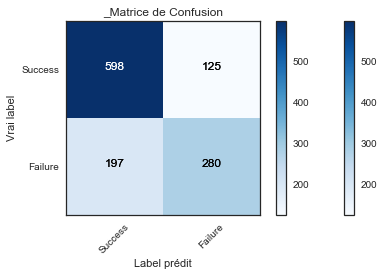

In [168]:
from sklearn.grid_search import GridSearchCV

knn = KNeighborsClassifier()
parameters = {'n_neighbors':[5,6,7], 
              'p':[1,2],
              'weights':['uniform','distance']}
clf_knn = get_best_model(knn,parameters)
model_fit(model=clf_knn, feature_imp=False)

# Naive Bayes


--- Ensemble de Train -----------------------------
Accuracy: 0.75993 +/- 0.0137
AUC: 0.84284 +/- 0.0055

--- Ensemble de Validation -----------------------------
Accuracy: 0.74243 +/- 0.0225
AUC: 0.82013 +/- 0.0225
-----------------------------------------------


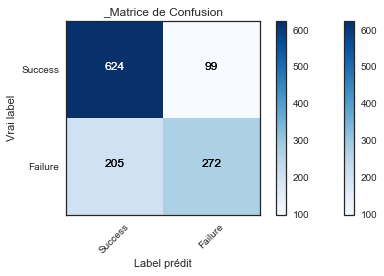

In [169]:
# Comme prévu, le classificateur Naive Bayes ne fonctionne pas bien ici.
# Il y a plusieurs raisons. Certaines caractéristiques numériques ne sont pas normalement distribuées, ce qui est une affirmation forte de Naive Bayes.
# De plus, les attributs ne sont définitivement pas indépendants 
from sklearn.naive_bayes import GaussianNB
clf_nb = GaussianNB()
model_fit(model=clf_nb,feature_imp=False)

# Random Forest


--- Meilleurs Parametres -----------------------------
{'max_depth': 10, 'max_features': 13, 'min_samples_split': 11, 'n_estimators': 100}

--- Meilleur Modele -----------------------------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=13, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=11,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=3, verbose=0, warm_start=False)

--- Ensemble de Train -----------------------------
Accuracy: 0.84852 +/- 0.0065
AUC: 0.92246 +/- 0.0083

--- Ensemble de Validation -----------------------------
Accuracy: 0.82163 +/- 0.0127
AUC: 0.90386 +/- 0.0064
-----------------------------------------------


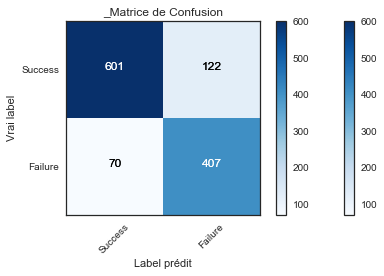

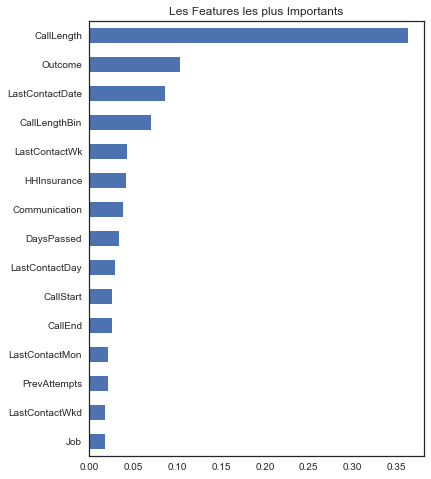

In [170]:
# I did some manual parameter tuning here. This is the best model so far. 
# Based on the feature importance report, call length, last contact week, and previous success are strong predictors of cold call success
rf = RandomForestClassifier(random_state=3)
parameters={'n_estimators':[100],
            'max_depth':[10],
            'max_features':[13,14],
            'min_samples_split':[11]}
clf_rf= get_best_model(rf,parameters)
model_fit(model=clf_rf, feature_imp=True)

# Logistic Regression


--- Meilleurs Parametres -----------------------------
{'C': 0.8, 'penalty': 'l1'}

--- Meilleur Modele -----------------------------
LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=3, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

--- Ensemble de Train -----------------------------
Accuracy: 0.81173 +/- 0.0119
AUC: 0.89748 +/- 0.0126

--- Ensemble de Validation -----------------------------
Accuracy: 0.79330 +/- 0.0231
AUC: 0.88136 +/- 0.0135
-----------------------------------------------


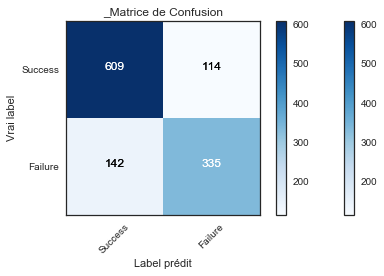

In [173]:
# We're making progress here. Logistic regression performs better than KNN. 
lg = LogisticRegression(random_state=3)
parameters = {'C':[0.8,0.9,1], 
              'penalty':['l1','l2']}
clf_lg = get_best_model(lg,parameters)
model_fit(model=clf_lg, feature_imp=False)

# Decision Tree avec GINI


--- Meilleurs Parametres -----------------------------
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'random_state': 100}

--- Meilleur Modele -----------------------------
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

--- Ensemble de Train -----------------------------
Accuracy: 0.79386 +/- 0.0189
AUC: 0.87223 +/- 0.0102

--- Ensemble de Validation -----------------------------
Accuracy: 0.76163 +/- 0.0139
AUC: 0.84193 +/- 0.0114
-----------------------------------------------


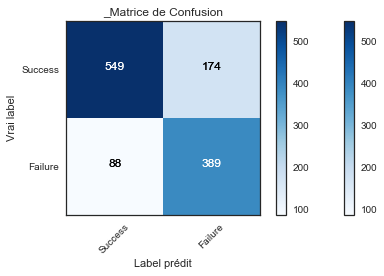

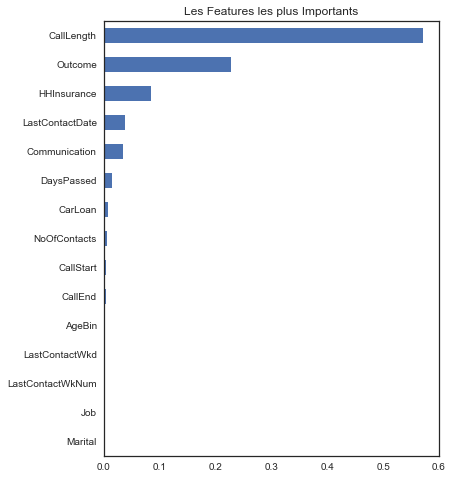

In [172]:
from sklearn.tree import DecisionTreeClassifier 
parameters = {'criterion': ["gini"], 'random_state' : [100], 
                                     'max_depth' : [5], 
                                     'min_samples_leaf' : [5]}
#X_train, X_test, y_train, y_test = train_test_split( 
#           X, Y, test_size = 0.3, random_state = 100) 

'''
{"criterion": ["gini", "entropy"],
              "min_samples_split": randint(1, 20),
              "max_depth": randint(1, 20),
              "min_samples_leaf": randint(1, 20),
              "max_leaf_nodes": randint(2, 20)}
'''
dt_clf_gini = DecisionTreeClassifier()
dt_clf_gini.fit(x_train, y_train) 
#(criterion = "gini", random_state = 100, max_depth = 5, min_samples_leaf = 5)

clf_gini = get_best_model(dt_clf_gini,parameters)
model_fit(model=clf_gini, feature_imp=True)
#clf_gini = get_best_model(dt_clf_gini)

#model_fit(model=clf_knn, feature_imp=False)

#dt_clf_gini.fit(X_train, y_train) 
#y_pred_gini = clf_gini.predict(X_test) 
  
#print ("Desicion Tree using Gini Index\nAccuracy is ", accuracy_score(y_test, y_pred_gini)*100 ) 

# Decision Tree avec Entropy


--- Meilleurs Parametres -----------------------------
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'random_state': 100}

--- Meilleur Modele -----------------------------
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

--- Ensemble de Train -----------------------------
Accuracy: 0.79386 +/- 0.0189
AUC: 0.87223 +/- 0.0102

--- Ensemble de Validation -----------------------------
Accuracy: 0.76163 +/- 0.0139
AUC: 0.84193 +/- 0.0114
-----------------------------------------------


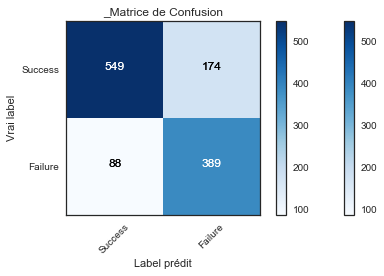

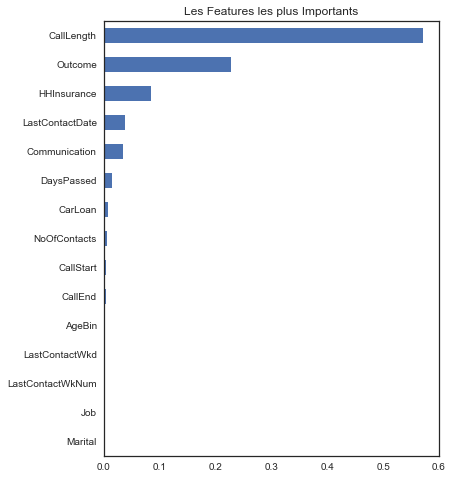

In [174]:
from sklearn.tree import DecisionTreeClassifier 
parameters = {'criterion': ["entropy"], 'random_state' : [100], 
                                     'max_depth' : [5], 
                                     'min_samples_leaf' : [5]}
'''
{"criterion": ["gini", "entropy"],
              "min_samples_split": randint(1, 20),
              "max_depth": randint(1, 20),
              "min_samples_leaf": randint(1, 20),
              "max_leaf_nodes": randint(2, 20)}
'''
dt_clf_entropy = DecisionTreeClassifier()
dt_clf_entropy.fit(x_train, y_train) 

clf_dtentropy = get_best_model(dt_clf_entropy,parameters)
model_fit(model=clf_gini, feature_imp=True)

# Evaluation des Modeles

In [175]:

# Compare model performance
clfs= [clf_knn, clf_nb, clf_rf, lg, clf_gini, clf_dtentropy]
index =['K-Nearest Neighbors','Naive Bayes','Random Forest','Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy']
scores=[]
for clf in clfs:
    score = np.mean(cross_val_score(clf,x_test,y_test,cv=5,scoring = 'accuracy'))
    scores = np.append(scores,score)
models = pd.Series(scores,index=index)
models.sort_values(ascending=False)

Random Forest            0.821629
Logistic Regression      0.787483
Decision Tree Entropy    0.767431
Decision Tree Gini       0.761632
Naive Bayes              0.742430
K-Nearest Neighbors      0.712510
dtype: float64

# Appliquer le Vote pour le choix du modéle

In [176]:

# XGBoost and Random Forest show different important features, implying that those models are capturing different aspects of the data
# To get the final model, I ensembled different classifiers based on majority voting.
# XGBoost and Random Forest are given larger weights due to their better performance. 
from sklearn.ensemble import VotingClassifier

clf_vc = VotingClassifier(estimators=[('knn', clf_knn),('nb', clf_nb),('rf', clf_rf)],voting='hard',weights=[4,4,1])
clf_vc = clf_vc.fit(x_train, y_train)


In [177]:
print('Final Model Accuracy: %.5f'%(accuracy_score(y_test, clf_vc.predict(x_test))))

Final Model Accuracy: 0.79250


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [178]:
accur=accuracy_score(y_test, clf_rf.predict(x_test))
accur

0.84

# Exporter le modele de Random Forest

In [179]:
import pickle
pickle.dump(clf_rf, open('model_clf_RandomForest_LE.pkl', 'wb'))

In [180]:
all_df.columns.tolist()

['Job',
 'Marital',
 'Education',
 'Default',
 'HHInsurance',
 'CarLoan',
 'Communication',
 'LastContactDay',
 'NoOfContacts',
 'DaysPassed',
 'PrevAttempts',
 'Outcome',
 'CallStart',
 'CallEnd',
 'AgeBin',
 'BalanceBin',
 'CallLength',
 'CallLengthBin',
 'CallStartHour',
 'LastContactDate',
 'LastContactWkd',
 'LastContactMon',
 'LastContactWk',
 'LastContactWkNum']

In [181]:
all_df.shape[1]

24

# Matrice de Corrélation Label Encoding:


In [189]:
df_le = pd.read_csv(path+'train_LabelEncoding.csv', encoding='utf8', sep=',')
df_le.shape
MC=pd.concat([df_le, train_label],axis=1)

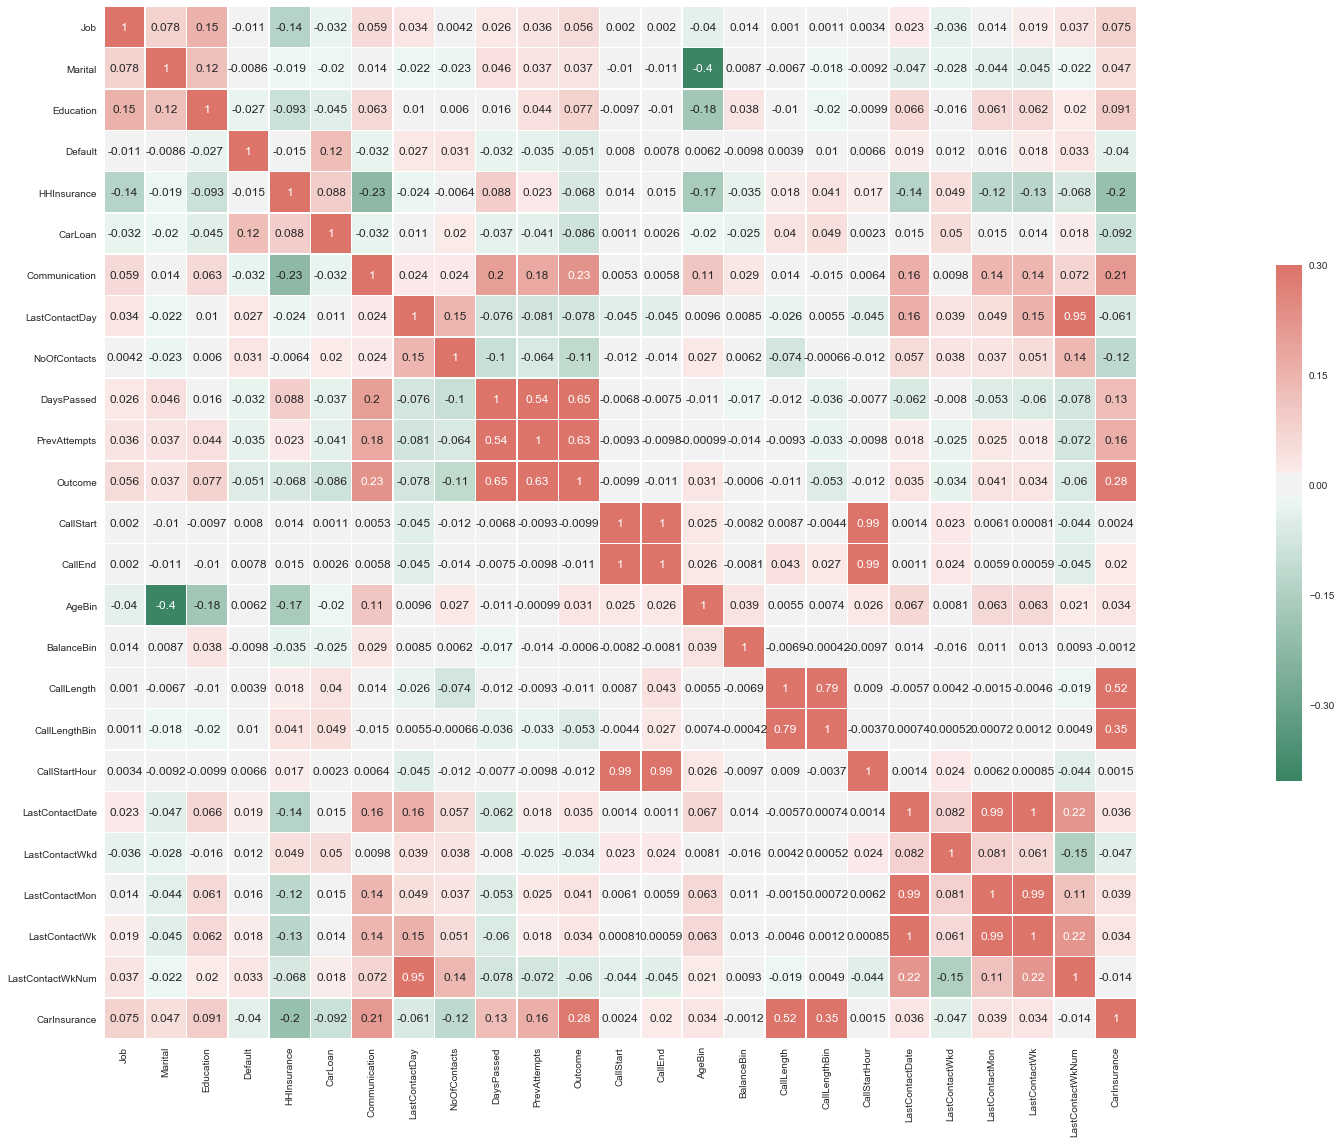

In [190]:

sns.set(style="white")
corr = MC.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = False
f, ax = plt.subplots(figsize=(50, 19))
cmap = sns.diverging_palette(150, 15, as_cmap=True)
sns.heatmap(corr,annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
plt.savefig("Matrice_Correlation_Label_Encoding.png")
plt.show()